In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [159]:
red_wine = pd.read_csv('winequality_red.csv')

In [3]:
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Regression Problem (Predicting the quality of Red Wine)

## EDA and feature engg

In [5]:
red_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

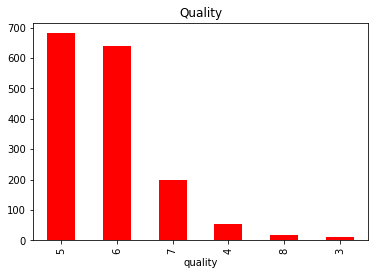

In [6]:
red_wine['quality'].value_counts().plot(kind='bar', color='red')
plt.xlabel('quality')
plt.title('Quality')
plt.show()

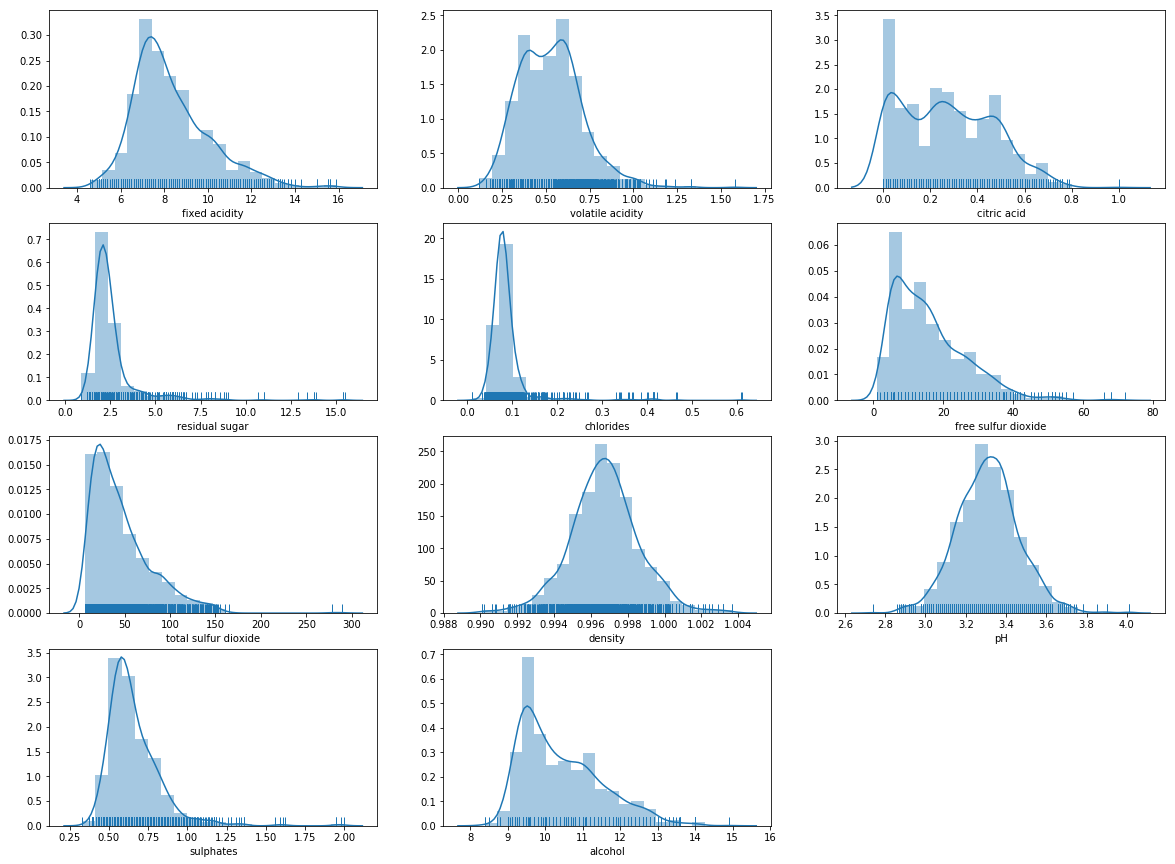

In [7]:
cols = red_wine.columns[:11]

plt.figure(figsize=(20,15))
#sns.distplot(a=red_wine['fixed acidity'], bins=20, rug=True)
j = 1
for i in cols:
    plt.subplot(4,3,j)
    sns.distplot(a=red_wine[i], bins=20, rug=True)
    j += 1

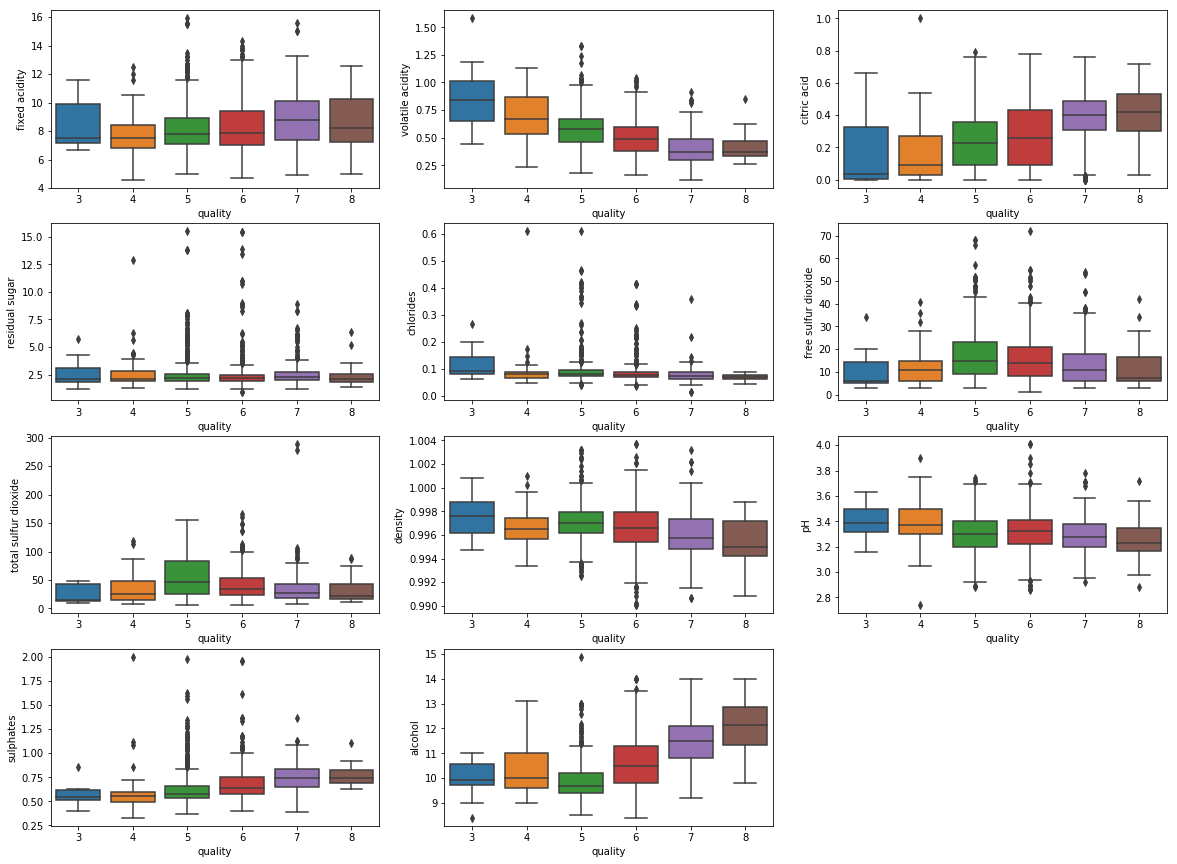

In [8]:
plt.figure(figsize=(20,15))
#sns.distplot(a=red_wine['fixed acidity'], bins=20, rug=True)
j = 1
for i in cols:
    plt.subplot(4,3,j)
    sns.boxplot(x = red_wine['quality'], y = red_wine[i])
    j += 1

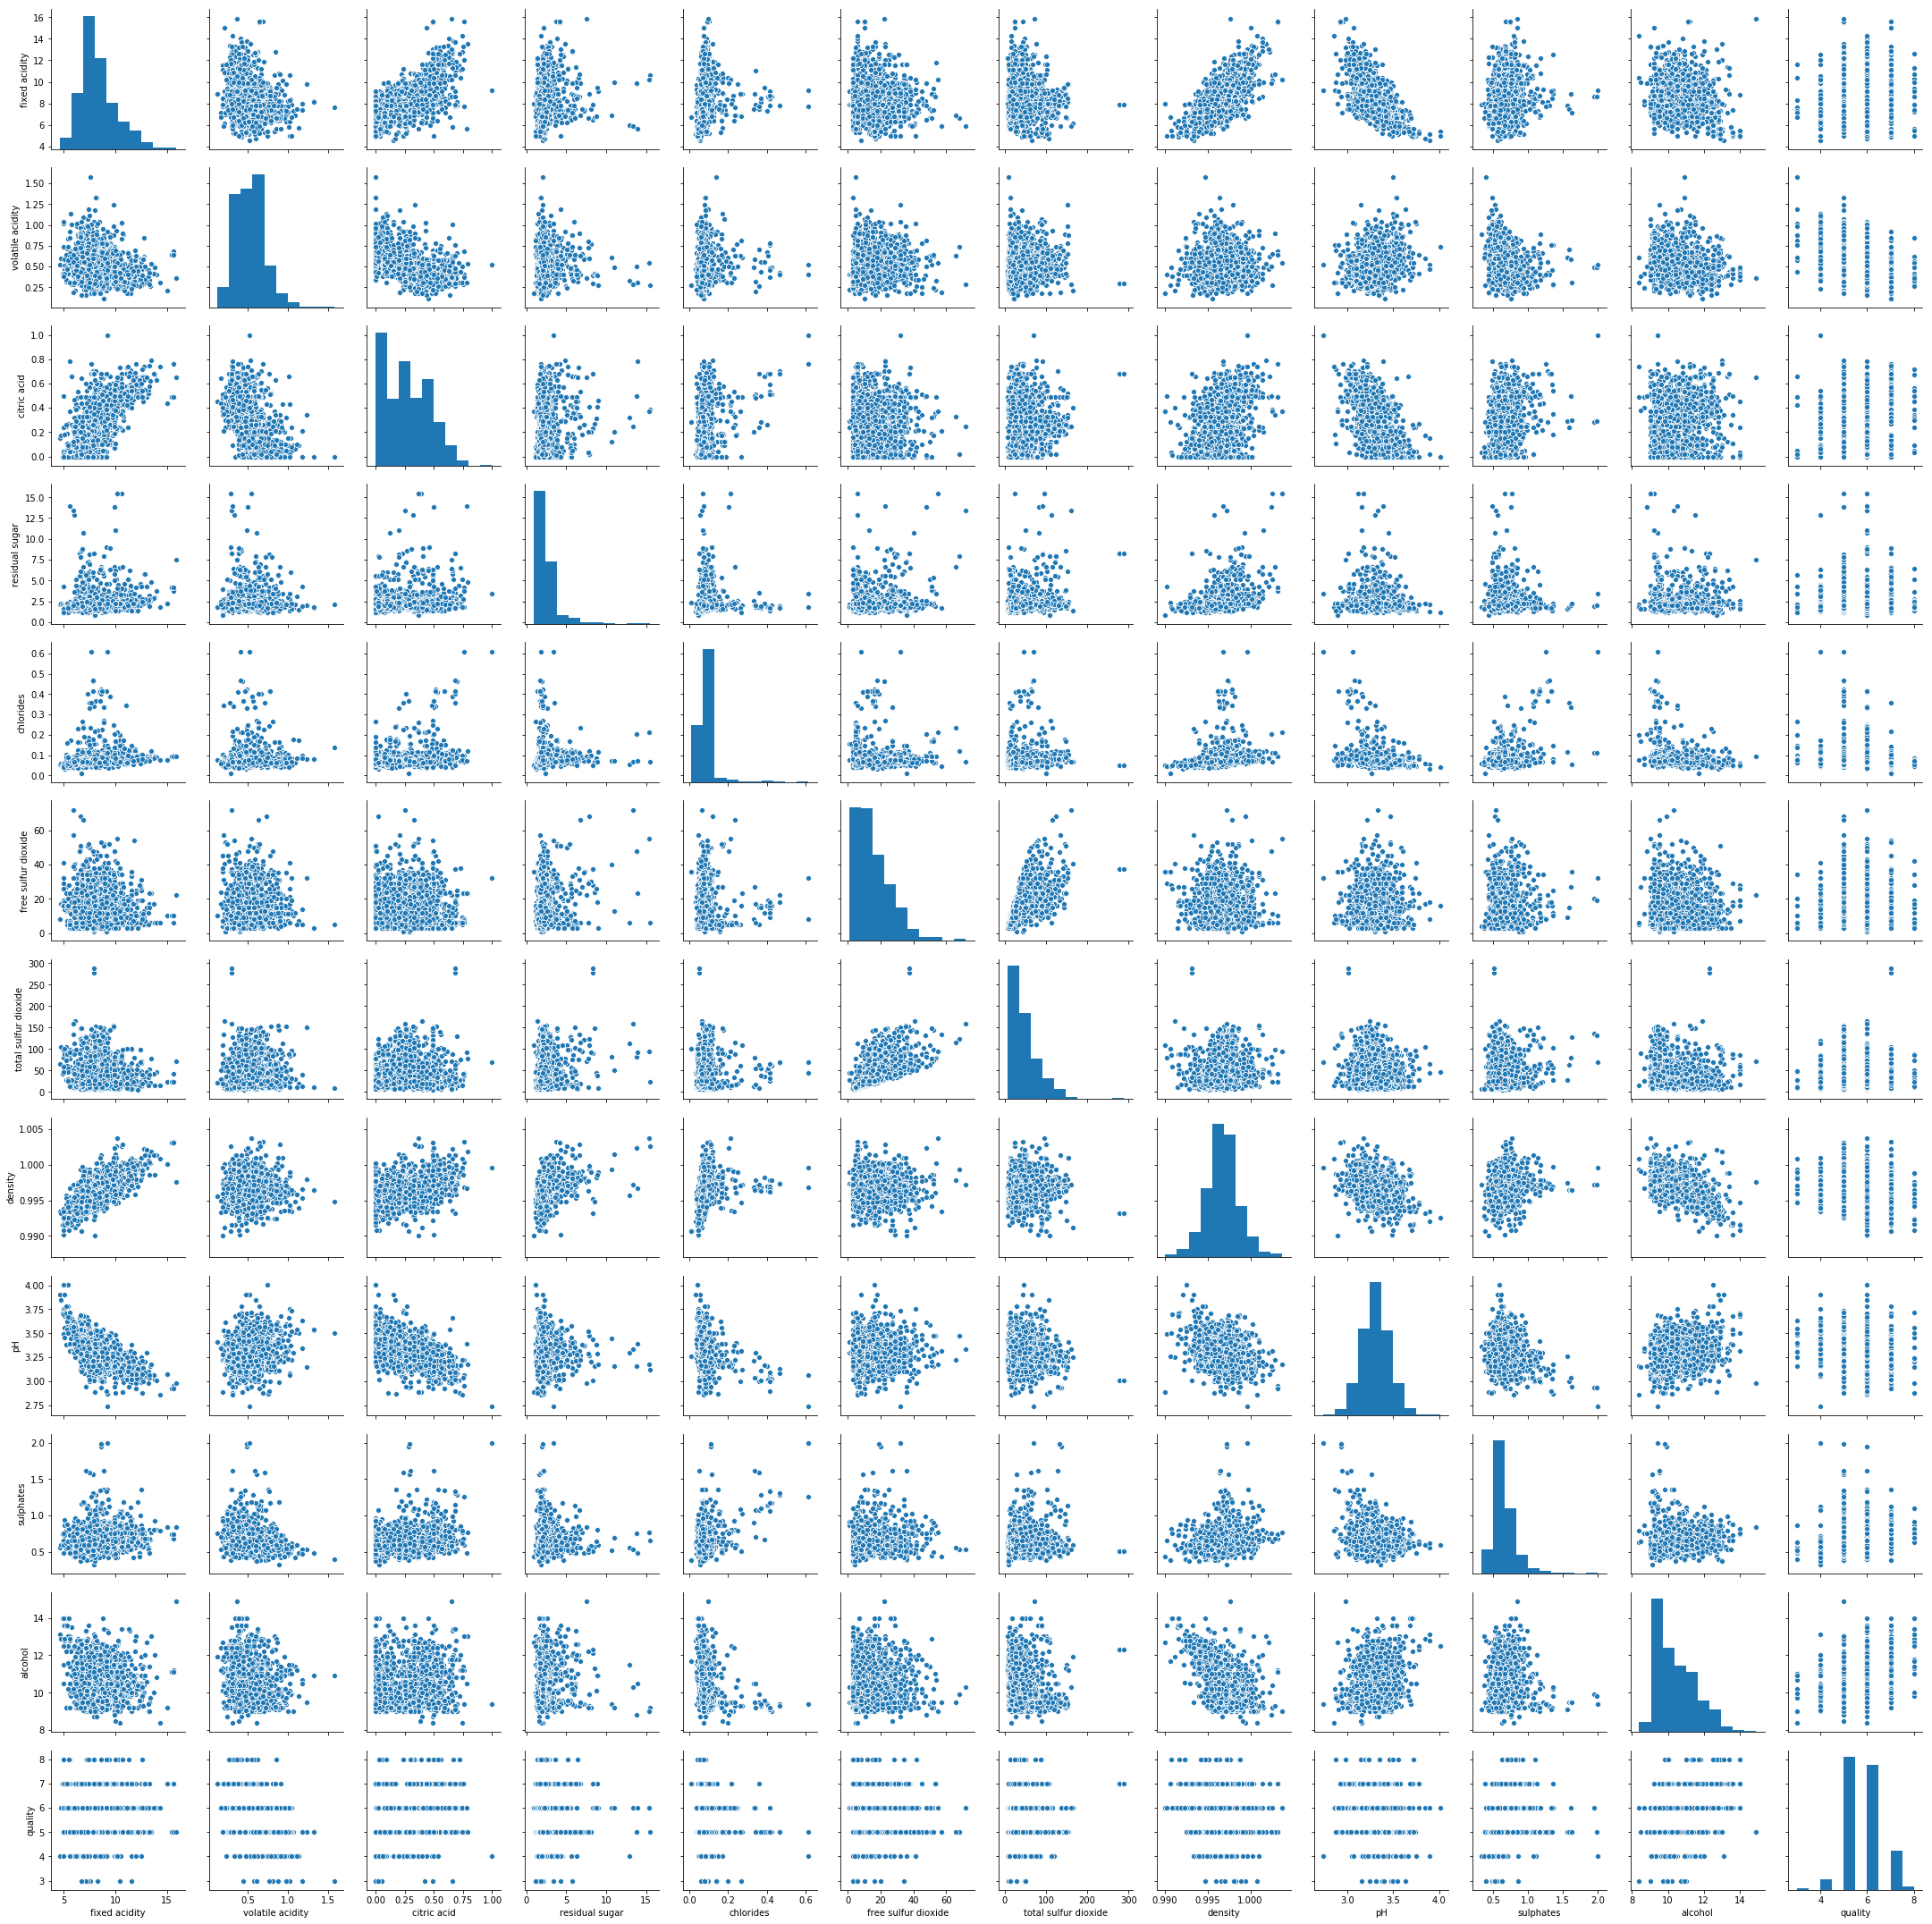

In [9]:
sns.pairplot(data=red_wine)

#### Since we can see many of the features in the data are right skewed so we will apply log transformation so that they can be normalized

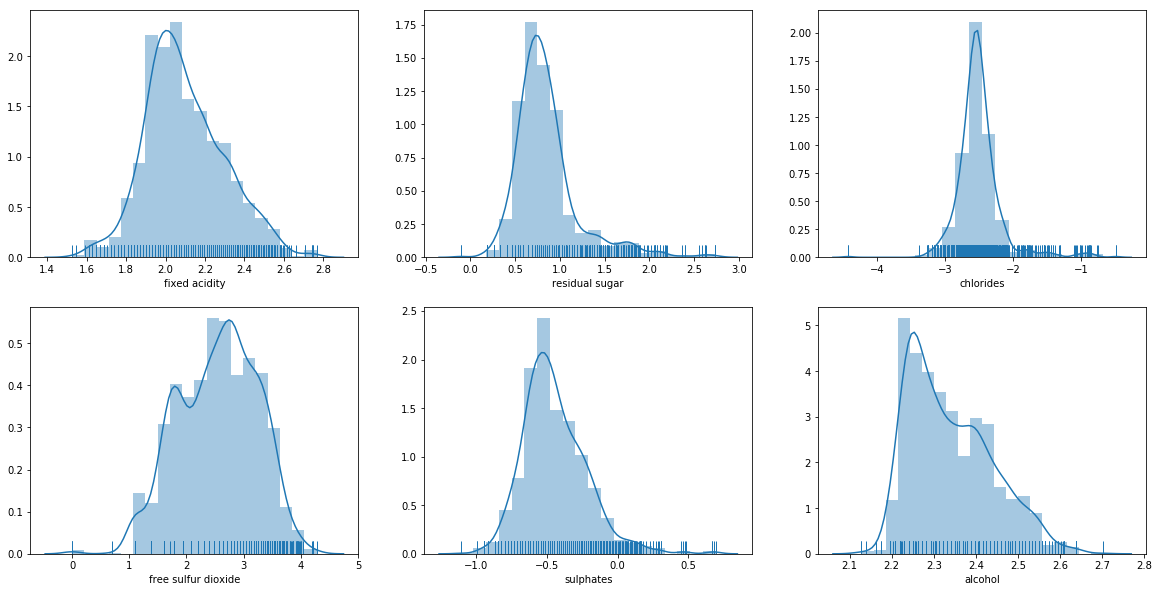

In [10]:
cols_norm = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']

for i in cols_norm:
    red_wine[i] = red_wine[i].apply(np.log)
    
plt.figure(figsize=(20,10))
j = 1
for i in cols_norm:
    plt.subplot(2,3,j)
    sns.distplot(a=red_wine[i], bins=20, rug=True)
    j += 1

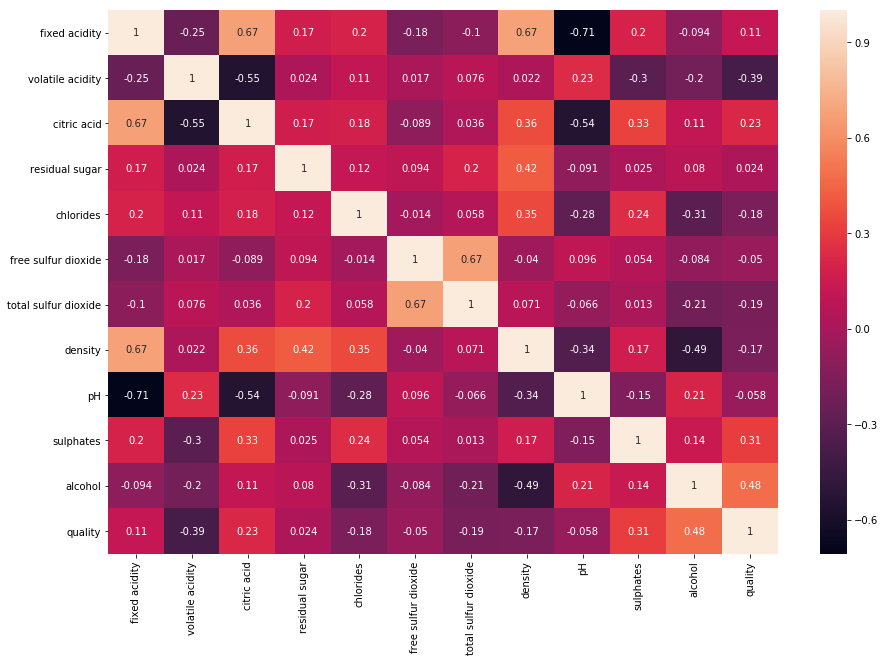

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data=red_wine.corr(), annot=True)

In [12]:
X = red_wine.drop('quality', axis=1)
y = red_wine['quality']

In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state = 42)

In [14]:
xtrain.shape

(1199, 11)

In [15]:
xtest.shape

(400, 11)

In [16]:
from sklearn.metrics import mean_absolute_error
def Error_metric(actual, predicted, set_type):
    er = mean_absolute_error(actual, predicted)
    print('{} : {}'.format(set_type, np.sqrt(er)))

#### Linear Reg

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('Train Score : {}, Test Score : {}'.format(lr.score(xtrain, ytrain), lr.score(xtest, ytest)))

Train Score : 0.36780069350962274, Test Score : 0.3842429911550187


In [19]:
Error_metric(ytrain, lr.predict(xtrain), 'train')
Error_metric(ytest, lr.predict(xtest), 'test')

train : 0.7028970411327172
test : 0.7019083812331375


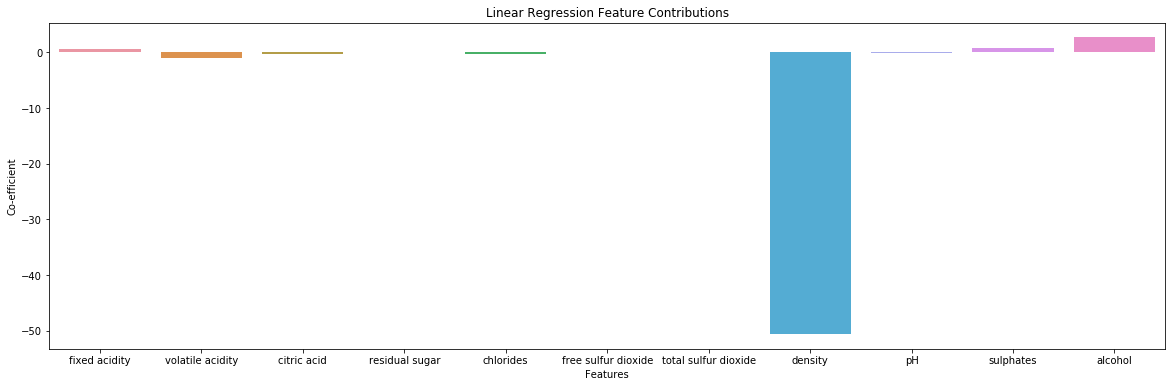

In [148]:
dict_lr = {'Features': xtrain.columns, 'Co-efficient': lr.coef_}
lr_coef = pd.DataFrame(dict_lr)
plt.figure(figsize=(20,6))
sns.barplot(x=lr_coef['Features'], y=lr_coef['Co-efficient'])
plt.title('Linear Regression Feature Contributions')
plt.show()

#### Ridge Reg

In [20]:
from sklearn.linear_model import Ridge

rr = Ridge()

rr.fit(xtrain, ytrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
print('Train Score : {}, Test Score : {}'.format(rr.score(xtrain, ytrain), rr.score(xtest, ytest)))

Train Score : 0.36457097280059647, Test Score : 0.3835483975243379


In [22]:
Error_metric(ytrain, rr.predict(xtrain), 'train')
Error_metric(ytest, rr.predict(xtest), 'test')

train : 0.7055359948243981
test : 0.701211523324341


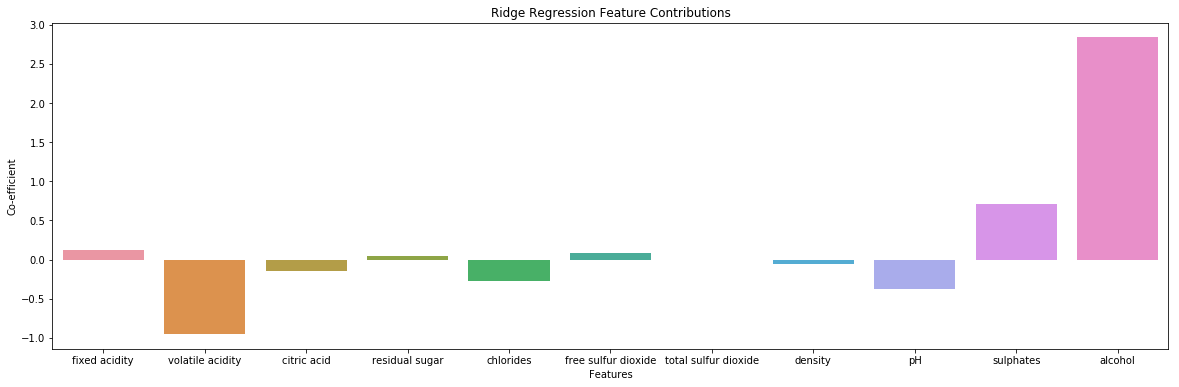

In [147]:
dict_rr = {'Features': xtrain.columns, 'Co-efficient': rr.coef_}
rr_coef = pd.DataFrame(dict_rr)
plt.figure(figsize=(20,6))
sns.barplot(x=rr_coef['Features'], y=rr_coef['Co-efficient'])
plt.title('Ridge Regression Feature Contributions')
plt.show()

#### KNN Reg

In [23]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [24]:
print('Train Score : {}, Test Score : {}'.format(knn.score(xtrain, ytrain), knn.score(xtest, ytest)))

Train Score : 0.41799220940121573, Test Score : 0.0801717605455925


In [25]:
Error_metric(ytrain, knn.predict(xtrain), 'train')
Error_metric(ytest, knn.predict(xtest), 'test')

train : 0.679252888895263
test : 0.7733045971672482


#### Decision Tree Regression

In [60]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42, max_depth=5)

dt.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [61]:
print('Train Score : {}, Test Score : {}'.format(dt.score(xtrain, ytrain), dt.score(xtest, ytest)))

Train Score : 0.4847313759455386, Test Score : 0.3470030505761945


In [62]:
Error_metric(ytrain, dt.predict(xtrain), 'train')
Error_metric(ytest, dt.predict(xtest), 'test')

train : 0.6620678044317078
test : 0.6987801399707755


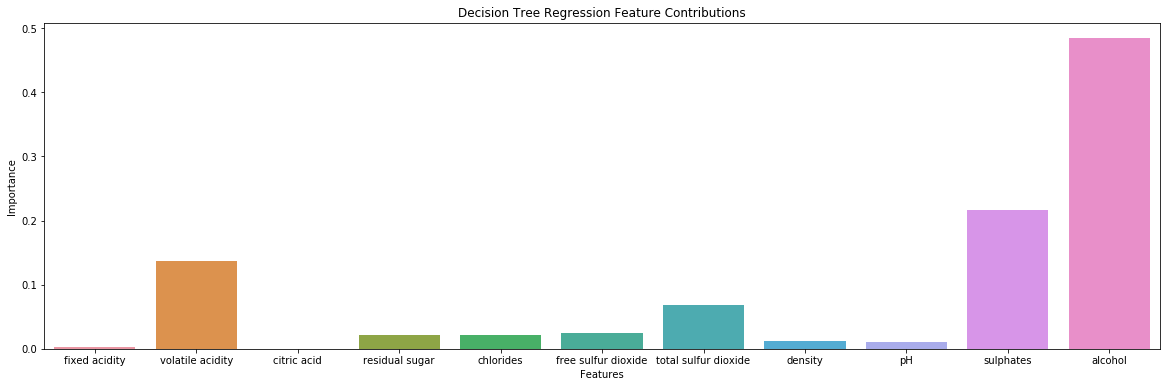

In [154]:
dict_dt = {'Features': xtrain.columns, 'Importance': dt.feature_importances_}
dt_coef = pd.DataFrame(dict_dt)
plt.figure(figsize=(20,6))
sns.barplot(x=dt_coef['Features'], y=dt_coef['Importance'])
plt.title('Decision Tree Regression Feature Contributions')
plt.show()

#### Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=8, oob_score=True)

rf.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [83]:
print('Train Score : {}, Test Score : {}'.format(rf.score(xtrain, ytrain), rf.score(xtest, ytest)))

Train Score : 0.7545726490578422, Test Score : 0.4546030179883238


In [84]:
Error_metric(ytrain, rf.predict(xtrain), 'train')
Error_metric(ytest, rf.predict(xtest), 'test')

train : 0.5570895612035603
test : 0.675794296722939


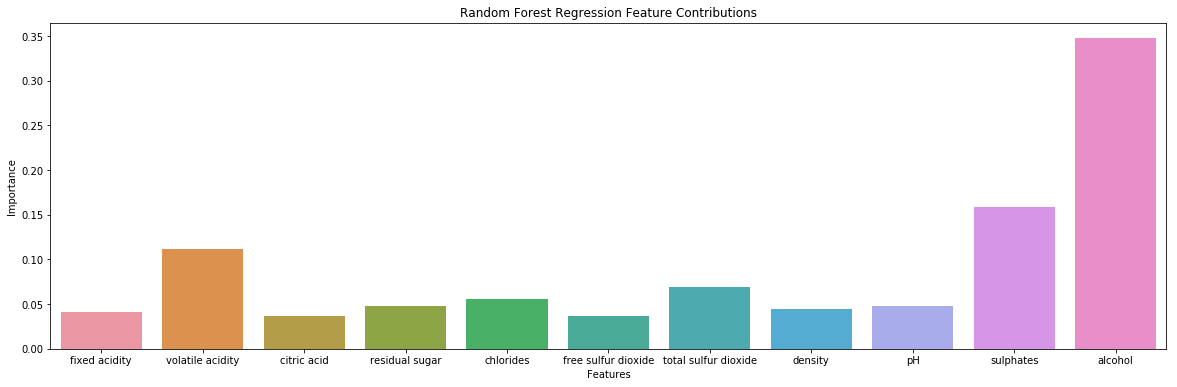

In [155]:
dict_rf = {'Features': xtrain.columns, 'Importance': rf.feature_importances_}
rf_coef = pd.DataFrame(dict_rf)
plt.figure(figsize=(20,6))
sns.barplot(x=rf_coef['Features'], y=rf_coef['Importance'])
plt.title('Random Forest Regression Feature Contributions')
plt.show()

#### XGBoost Regressor

In [132]:
import xgboost as xgb

xg = xgb.XGBRegressor(random_state=42, n_estimators=200, max_depth=10)

xg.fit(xtrain, ytrain)

[18:29:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [133]:
print('Train Score : {}, Test Score : {}'.format(xg.score(xtrain, ytrain), xg.score(xtest, ytest)))

Train Score : 0.9999969989335998, Test Score : 0.4877765674396648


In [134]:
Error_metric(ytrain, xg.predict(xtrain), 'train')
Error_metric(ytest, xg.predict(xtest), 'test')

train : 0.028595206715244056
test : 0.6264689240058874


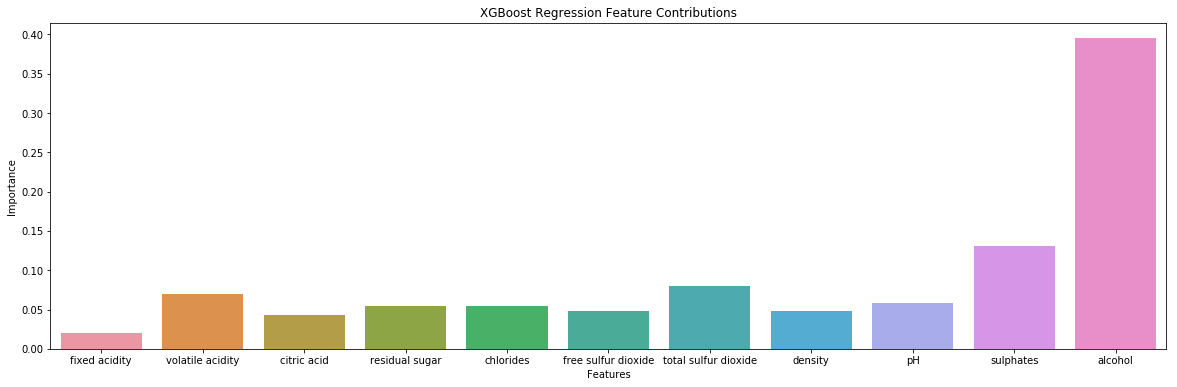

In [158]:
dict_xg = {'Features': xtrain.columns, 'Importance': xg.feature_importances_}
xg_coef = pd.DataFrame(dict_xg)
plt.figure(figsize=(20,6))
sns.barplot(x=xg_coef['Features'], y=xg_coef['Importance'])
plt.title('XGBoost Regression Feature Contributions')
plt.show()

# Classification Problem

In [160]:
red_wine = pd.read_csv('winequality_red.csv')
white_wine = pd.read_csv('winequality_white.csv')

In [161]:
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [175]:
df = pd.concat([red_wine, white_wine]).reset_index(drop=True)

In [176]:
df.shape

(6497, 13)

In [177]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red  
1      9.8        5       red  
2      9.8        5       red  
3      9.8        6       red  
4      9.4        5       red

In [178]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality wine_type  
6492     11.2        6     white  
6493      9.6        5     white  
6494      9.4        6     white  
6495     12.8        7     white  
6496     11.8        6     white

In [179]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

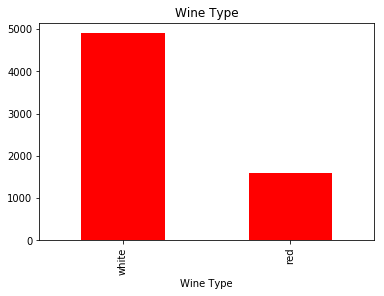

In [180]:
df['wine_type'].value_counts().plot(kind='bar', color='red')
plt.xlabel('Wine Type')
plt.title('Wine Type')
plt.show()

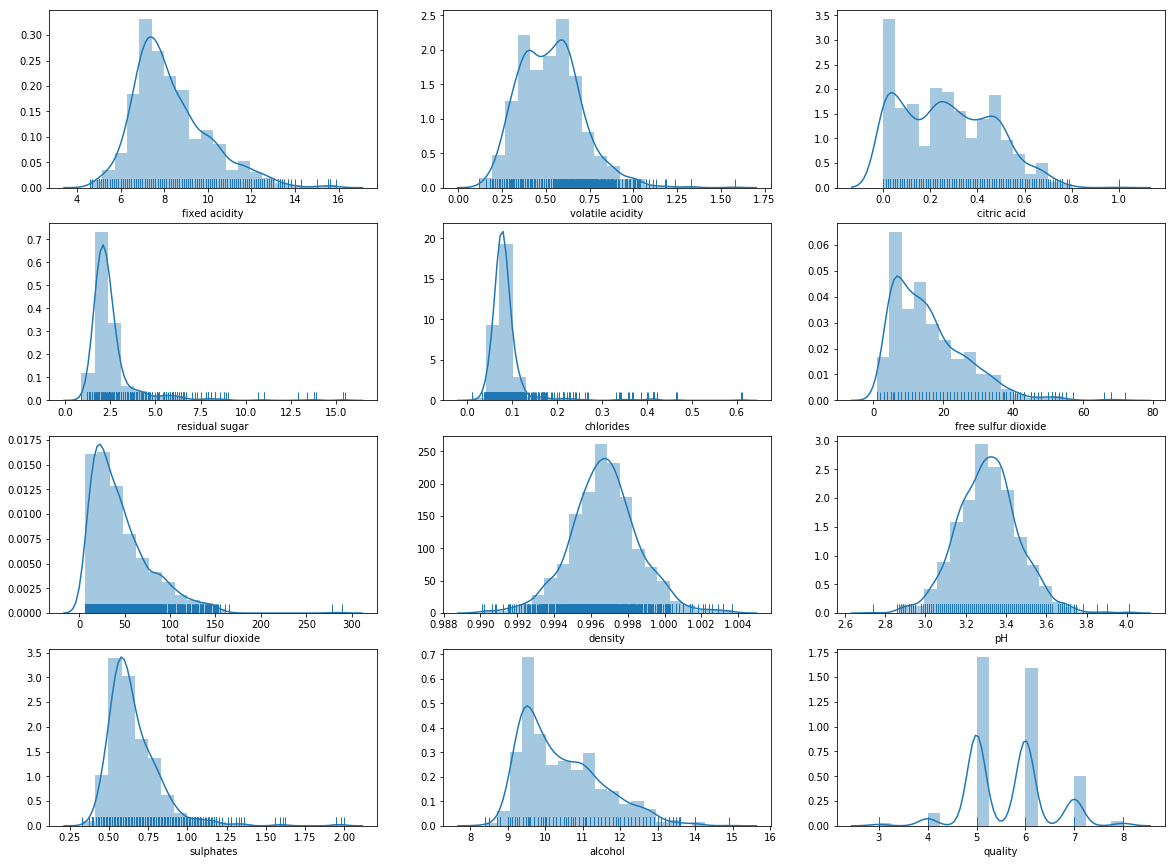

In [182]:
cols = df.columns[:12]

plt.figure(figsize=(20,15))
#sns.distplot(a=red_wine['fixed acidity'], bins=20, rug=True)
j = 1
for i in cols:
    plt.subplot(4,3,j)
    sns.distplot(a=red_wine[i], bins=20, rug=True)
    j += 1

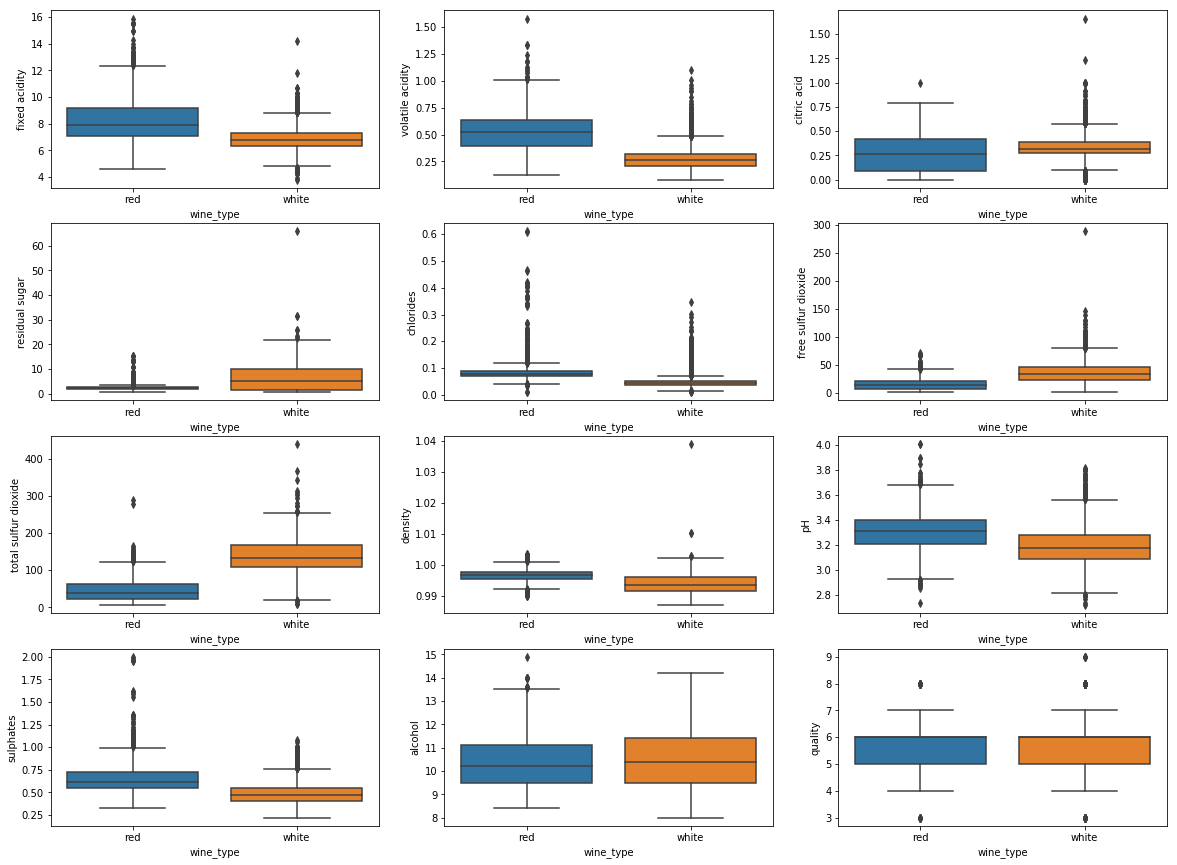

In [183]:
plt.figure(figsize=(20,15))
#sns.distplot(a=red_wine['fixed acidity'], bins=20, rug=True)
j = 1
for i in cols:
    plt.subplot(4,3,j)
    sns.boxplot(x = df['wine_type'], y = df[i])
    j += 1

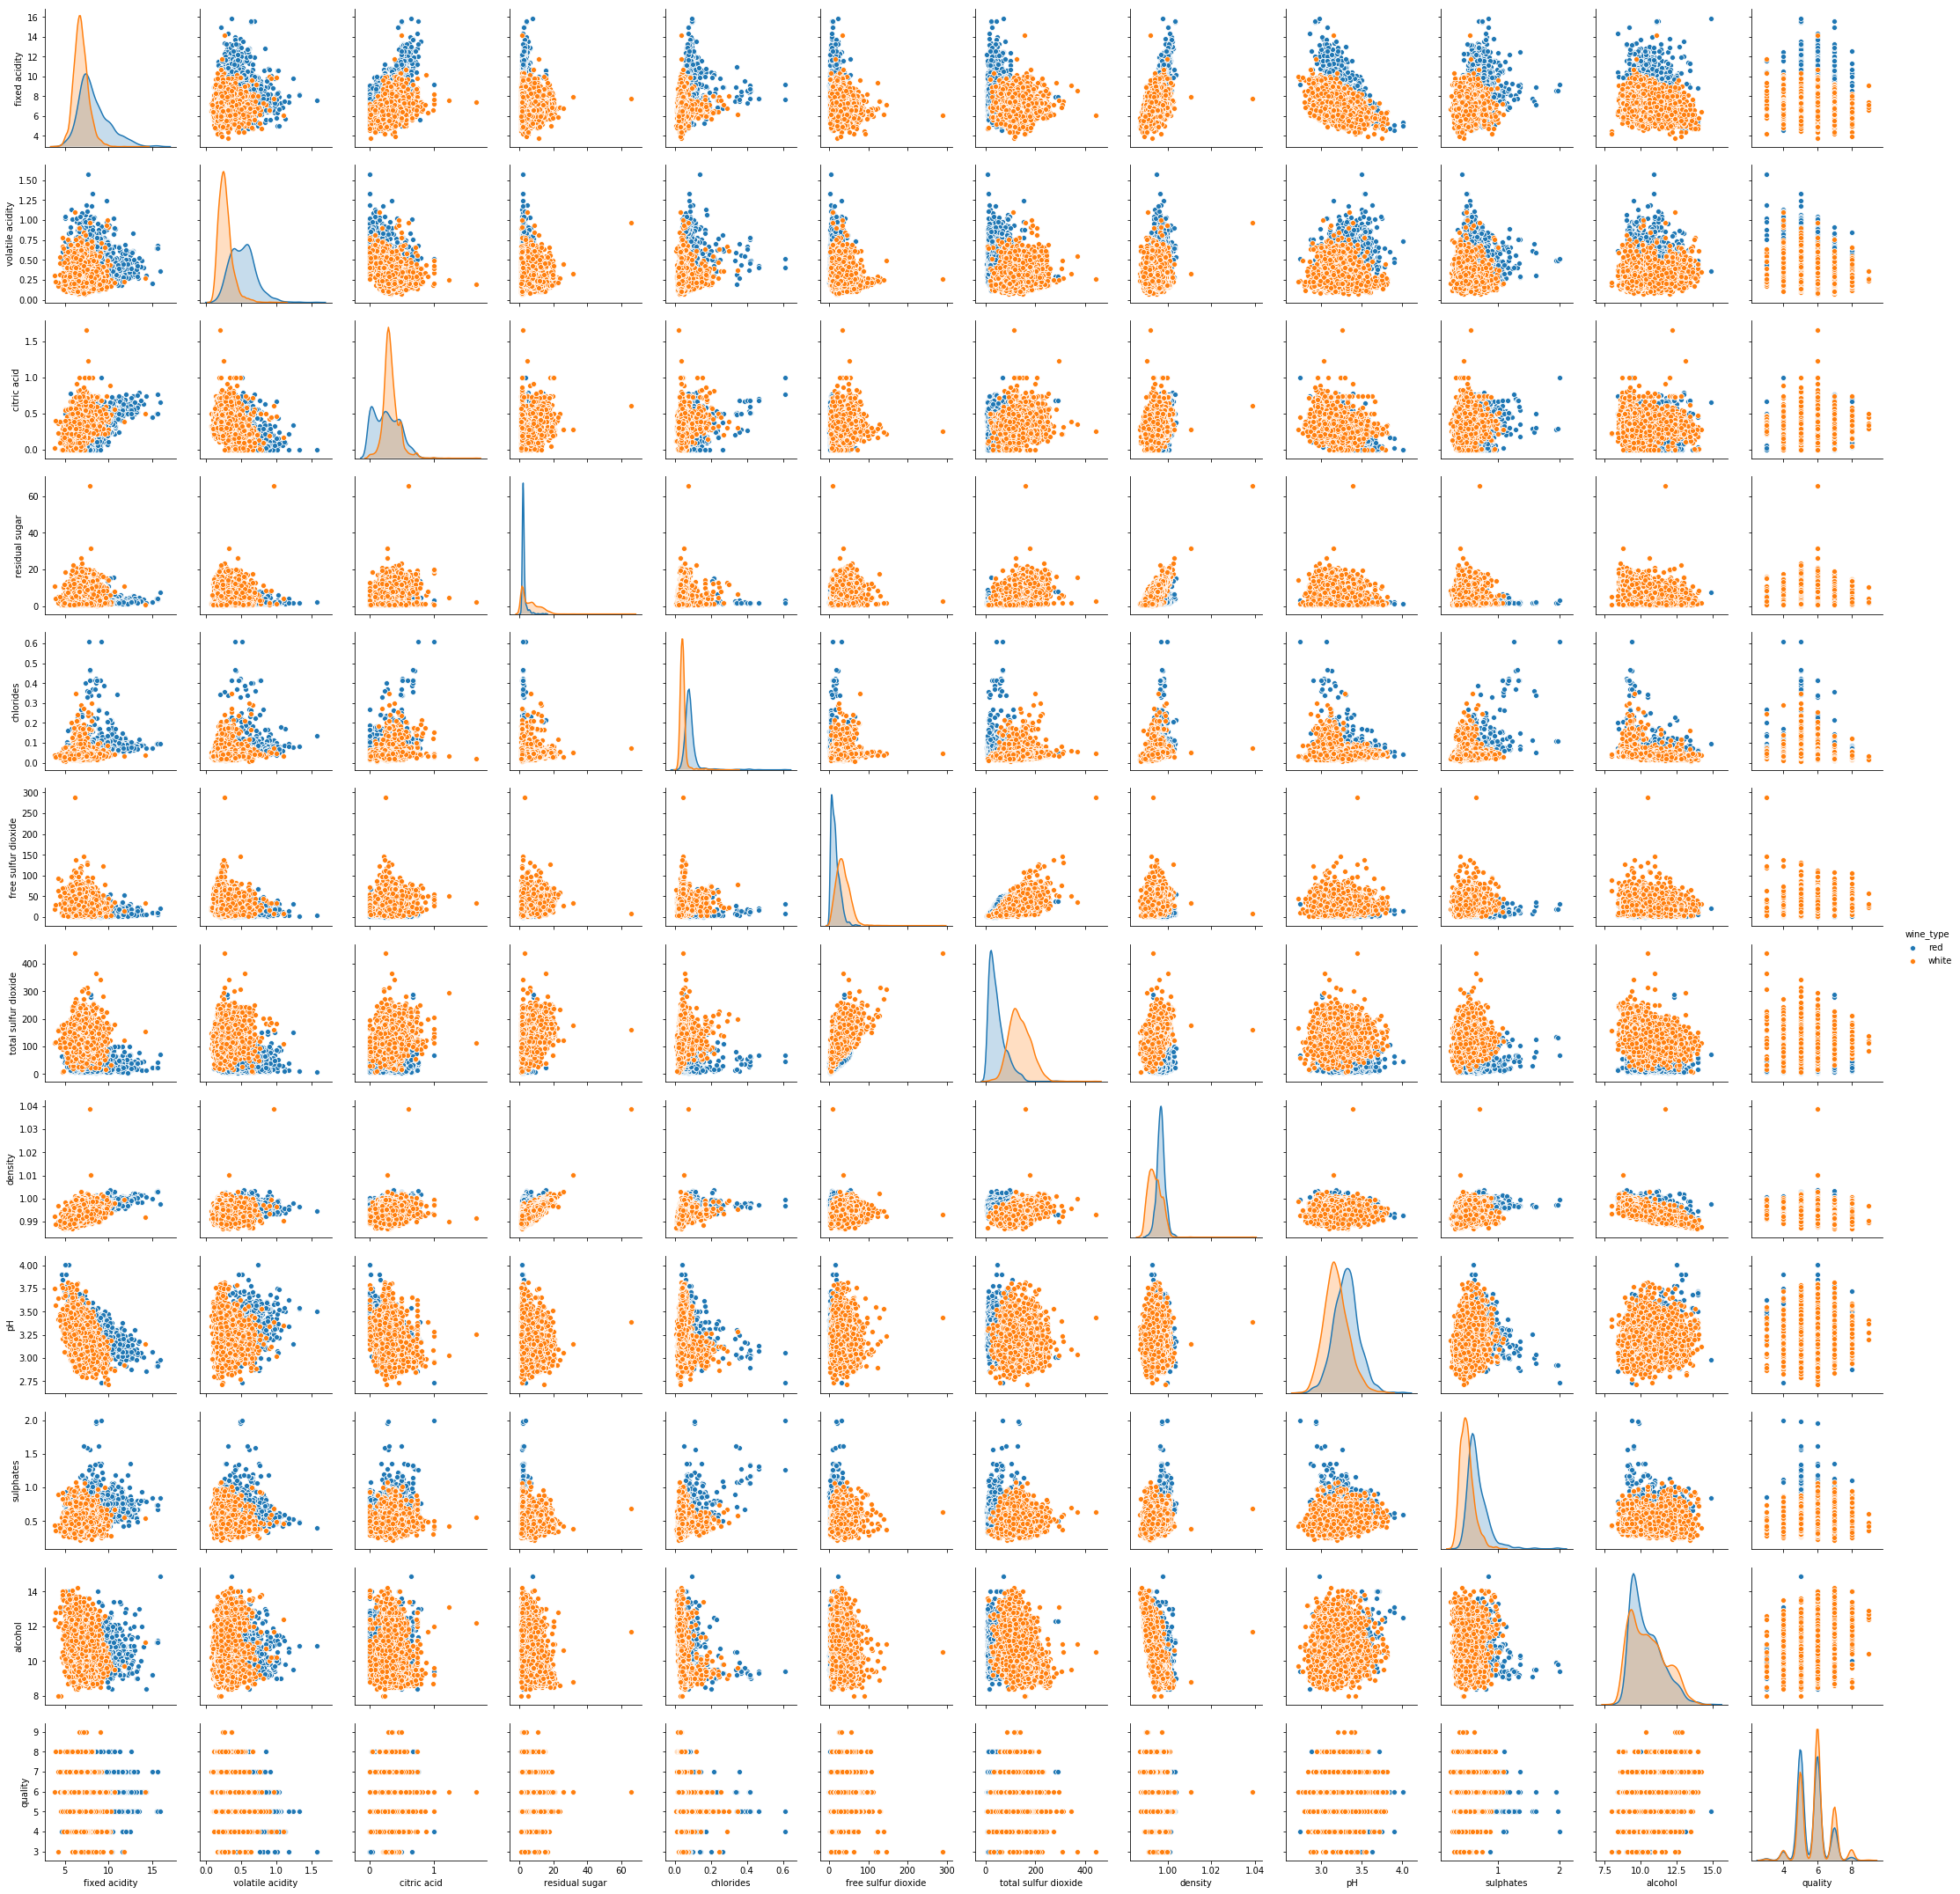

In [184]:
sns.pairplot(data=df, hue='wine_type')

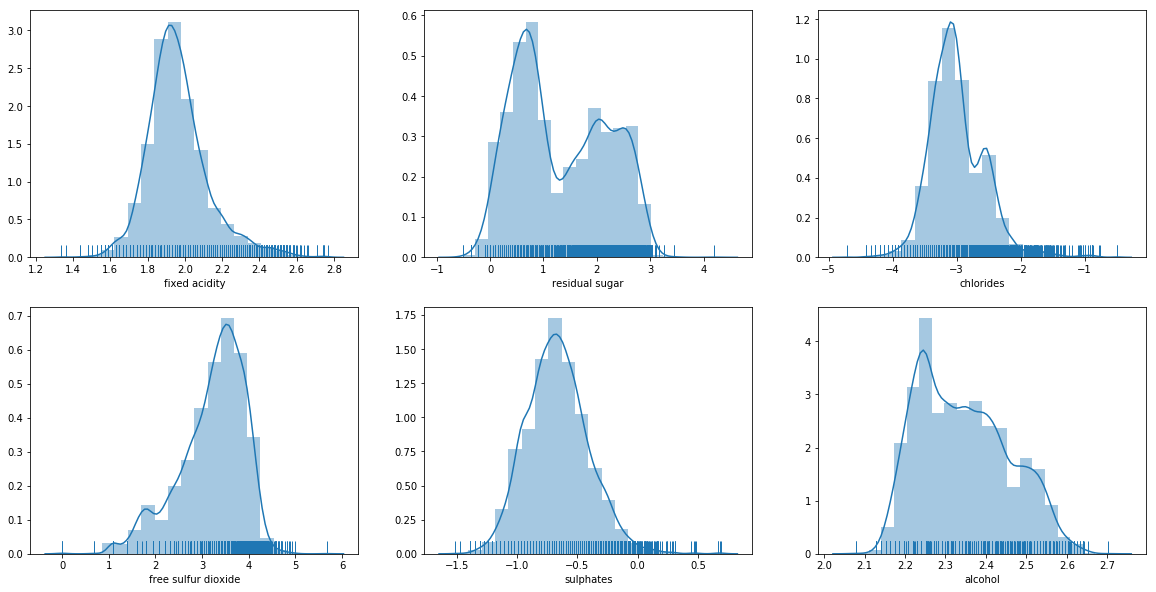

In [187]:
cols_norm = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']

for i in cols_norm:
    df[i] = df[i].apply(np.log)
    
plt.figure(figsize=(20,10))
j = 1
for i in cols_norm:
    plt.subplot(2,3,j)
    sns.distplot(a=df[i], bins=20, rug=True)
    j += 1

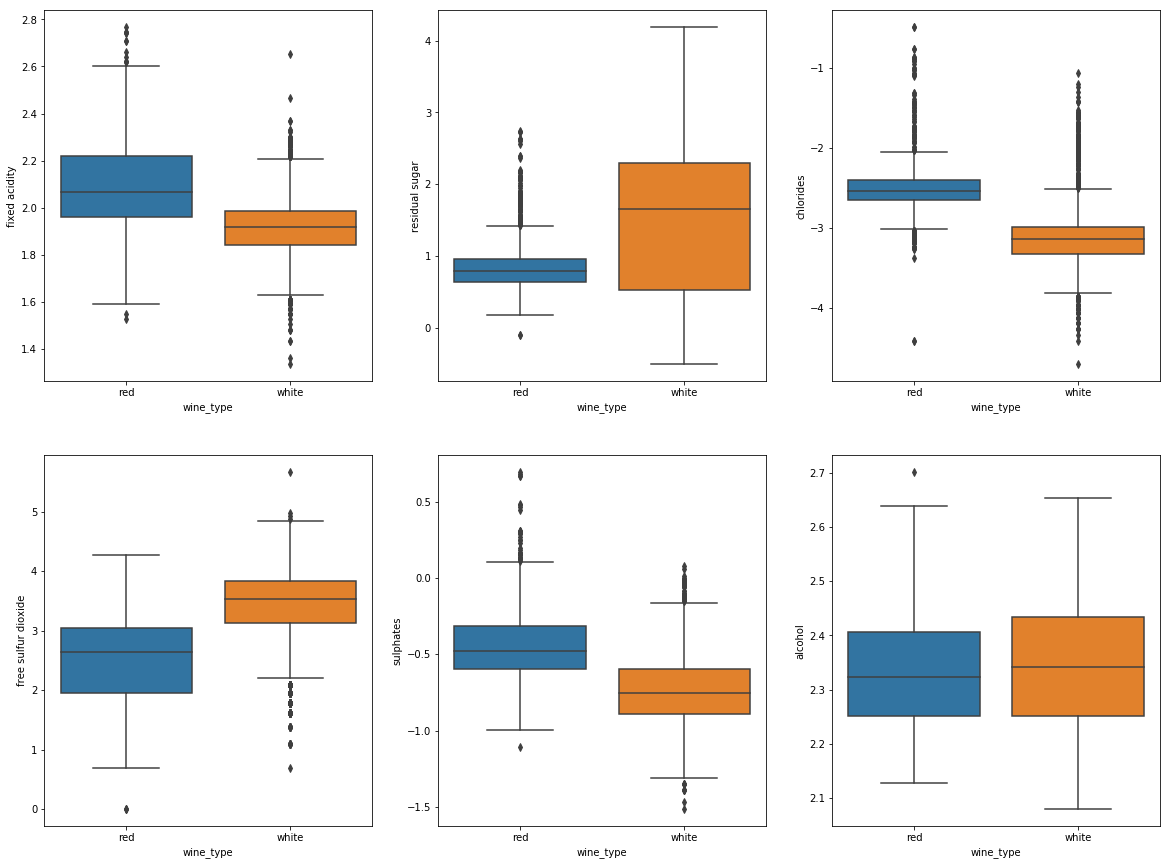

In [188]:
plt.figure(figsize=(20,15))
#sns.distplot(a=red_wine['fixed acidity'], bins=20, rug=True)
j = 1
for i in cols_norm:
    plt.subplot(2,3,j)
    sns.boxplot(x = df['wine_type'], y = df[i])
    j += 1

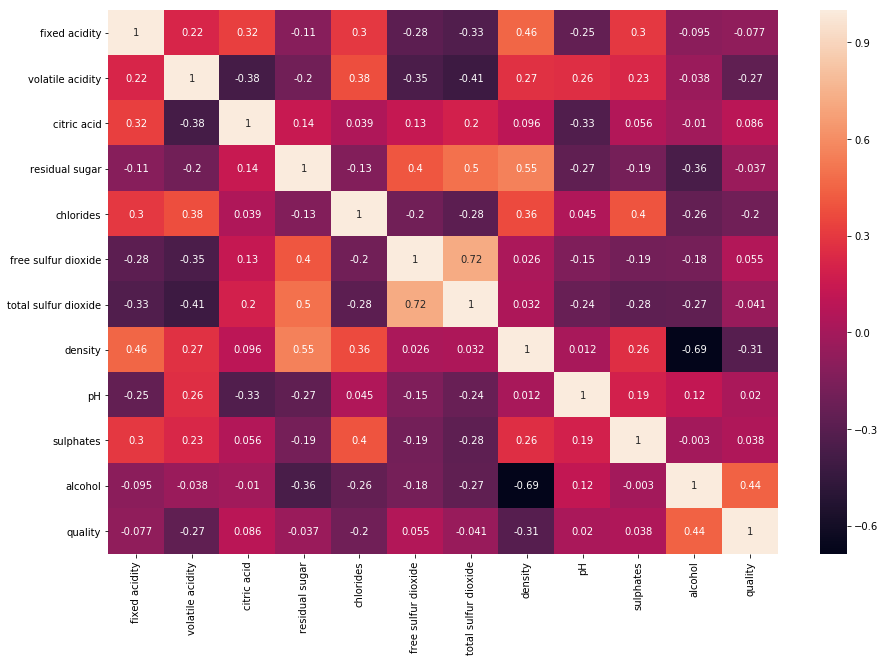

In [186]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), annot=True)

In [189]:
dict_label = {'red': 0, 'white': 1}
df['wine_type'] = df['wine_type'].map(dict_label)

In [190]:
X = df.drop('wine_type', axis=1)
y = df['wine_type']

In [191]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state = 42)

In [192]:
xtrain.shape

(4872, 12)

In [193]:
xtest.shape

(1625, 12)

In [196]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
def metrices(actual, predicted, set_type):
    print('Set Type : {}'.format(set_type))
    print('F1 score : {}'.format(f1_score(actual, predicted)))
    print('Confusion Metric : {}'.format(confusion_matrix(actual, predicted)))
    print('Classification Report : {}'.format(classification_report(actual, predicted)))

#### Logistic Regression Model

In [194]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

lr.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
print('Train Score : {}, Test Score : {}'.format(lr.score(xtrain, ytrain), lr.score(xtest, ytest)))

Train Score : 0.9885057471264368, Test Score : 0.9858461538461538


In [197]:
metrices(ytrain, lr.predict(xtrain), 'Train')
metrices(ytest, lr.predict(xtest), 'Test')

Set Type : Train
F1 score : 0.992465016146394
Confusion Metric : [[1128   37]
 [  19 3688]]
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1165
           1       0.99      0.99      0.99      3707

    accuracy                           0.99      4872
   macro avg       0.99      0.98      0.98      4872
weighted avg       0.99      0.99      0.99      4872

Set Type : Test
F1 score : 0.9903805938937683
Confusion Metric : [[ 418   16]
 [   7 1184]]
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.96      0.97       434
           1       0.99      0.99      0.99      1191

    accuracy                           0.99      1625
   macro avg       0.99      0.98      0.98      1625
weighted avg       0.99      0.99      0.99      1625



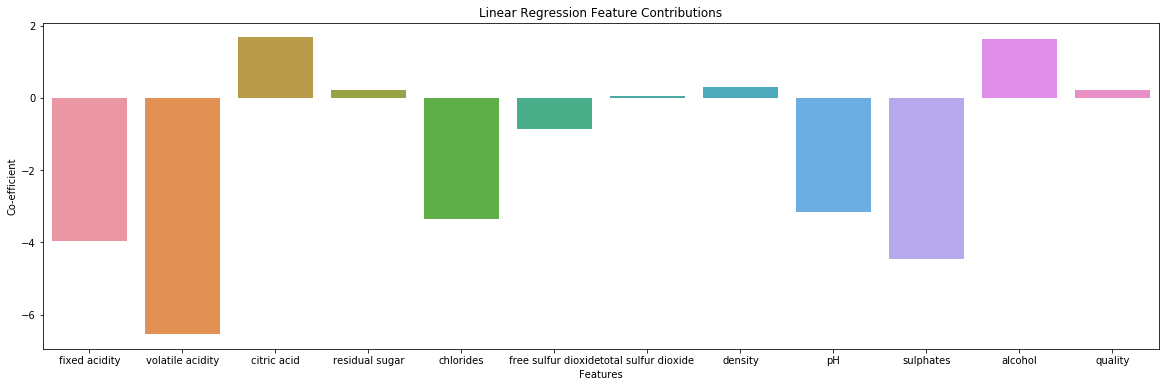

In [206]:
dict_lr = {'Features': xtrain.columns, 'Co-efficient': lr.coef_[0]}
lr_coef = pd.DataFrame(dict_lr)
plt.figure(figsize=(20,6))
sns.barplot(x=lr_coef['Features'], y=lr_coef['Co-efficient'])
plt.title('Linear Regression Feature Contributions')
plt.show()